In [3]:
import numpy as np
import ase
#from rotd_py.analysis import *
from rotd_py.analysis import get_micro, get_thermal, get_ej_flux, integrate_micro
from scipy.integrate import simps
import pandas as pd
import rotd_py.rotd_math as rotd_math
import fileinput
#import string

def generate_grid(start, interval, factor, num_point):                          
    #return the grid needed for simulation                                      
    #interval += interval * factor                                              
    #start += interval                                                          
    #return an numpy array with length of num_point                             
    i = 1                                                                       
    grid = [start]                                                              
    for i in range(1, num_point):                                               
        start += interval                                                       
        grid.append(start)                                                      
        interval = interval*factor                                              
    return np.array(grid)                                                       

# temperature, energy grid and angular momentum grid                            
temperature = generate_grid(10, 10, 1.05, 51)                                   
energy = generate_grid(0, 10, 1.05, 169)                                        
angular_mom = generate_grid(0, 1, 1.1, 40) 

In [4]:
e_flux = {}
num_surfaces = 16
for i in range(0, num_surfaces):
    print (i)
    flux = get_micro('surface_data_v0/surface_'+str(i)+'.dat', len(energy), 0)
    e_flux[str(i)]  = flux.copy()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [5]:
print (e_flux[str(i)])

[2.580e-15 2.926e-15 3.331e-15 3.808e-15 4.372e-15 5.039e-15 5.830e-15
 6.772e-15 7.896e-15 9.238e-15 1.085e-14 1.277e-14 1.509e-14 1.788e-14
 2.124e-14 2.530e-14 3.020e-14 3.612e-14 4.329e-14 5.198e-14 6.252e-14
 7.530e-14 9.081e-14 1.097e-13 1.325e-13 1.604e-13 1.942e-13 2.353e-13
 2.854e-13 3.463e-13 4.204e-13 5.106e-13 6.204e-13 7.540e-13 9.168e-13
 1.115e-12 1.356e-12 1.650e-12 2.008e-12 2.443e-12 2.973e-12 3.619e-12
 4.405e-12 5.362e-12 6.528e-12 7.947e-12 9.674e-12 1.178e-11 1.434e-11
 1.745e-11 2.125e-11 2.587e-11 3.149e-11 3.833e-11 4.665e-11 5.678e-11
 6.911e-11 8.412e-11 1.024e-10 1.246e-10 1.516e-10 1.845e-10 2.245e-10
 2.732e-10 3.324e-10 4.045e-10 4.921e-10 5.987e-10 7.284e-10 8.861e-10
 1.078e-09 1.311e-09 1.595e-09 1.940e-09 2.360e-09 2.871e-09 3.492e-09
 4.247e-09 5.165e-09 6.282e-09 7.640e-09 9.291e-09 1.130e-08 1.374e-08
 1.671e-08 2.032e-08 2.471e-08 3.004e-08 3.653e-08 4.442e-08 5.401e-08
 6.567e-08 7.985e-08 9.709e-08 1.180e-07 1.435e-07 1.745e-07 2.122e-07
 2.579

In [6]:
data = pd.DataFrame(e_flux)
min_e_flux =  data.min(axis = 1)
print (min_e_flux)

0      1.290000e-21
1      6.531000e-20
2      6.315000e-19
3      3.015000e-18
4      9.892000e-18
           ...     
164    1.946900e-02
165    2.378800e-02
166    2.906000e-02
167    3.549000e-02
168    4.333000e-02
Length: 169, dtype: float64


In [7]:
# This calls out the integrate_micro function implemented in the analysis.py

#print (integrate_micro(min_e_flux, energy, temperature, 9))
test = integrate_micro(min_e_flux, energy, temperature, 9)
print (test)

[30.76582228 39.70064292 47.90632288 54.95816234 60.83184432 65.49153089
 68.85491147 70.8969621  71.70764361 71.47039375 70.41224489 68.76086616
 66.71830335 64.44937737 62.0799292  59.70061152 57.37313416 55.13698616
 53.01552096 51.02090495 49.15782896 47.42611021 45.82241371 44.34133999
 42.97609701 41.71892449 40.56138828 39.49461759 38.50952493 37.59702509
 36.74825493 35.95478724 35.2088279  34.50338473 33.83239724 33.19081905
 32.57464772 31.98090081 31.40754034 30.85335243 30.31779171 29.80080343
 29.3026378  28.82367149 28.36425058 27.92456633 27.50457211 27.10394527
 26.72209322 26.35819899 26.01129819]


In [8]:
tst_out = open('C_surface_data/tst.out').readlines() #This is the C++ data, with output of tst.out
tst_out_me = open('tst_me.out').readlines()

# tst_me.out is the test data made by Xi
# Made to validate the data, which is not necessary any more.
# However, will keep this here, to explain the original overall process

In [9]:
# This is also needed for data validation
# Only look at the orig_rotd(Since all the validation has been completed,
#                            and we will be using the data created by the analysis.py)

orig_rotd = np.zeros(len(temperature))
me_rotd = np.zeros(len(temperature))

for i in range(0, len(temperature)):
    orig_rotd[i] = float(tst_out[i+273].split()[2])
for i in range(0, len(temperature)):
    me_rotd[i] = float(tst_out_me[i+61].split()[1])

In [10]:
print (orig_rotd)
print (len(orig_rotd))

[31.87 40.54 48.71 55.9  62.01 66.92 70.54 72.84 73.86 73.77 72.78 71.1
 68.96 66.54 63.99 61.43 58.92 56.51 54.25 52.14 50.18 48.38 46.72 45.2
 43.8  42.51 41.33 40.24 39.23 38.29 37.42 36.59 35.82 35.09 34.39 33.72
 33.09 32.47 31.88 31.32 30.77 30.24 29.73 29.23 28.76 28.3  27.85 27.42
 27.   26.6  26.21]
51


In [11]:
print (me_rotd)
print (len(me_rotd))

[46.98 53.04 56.15 58.12 60.08 62.17 64.16 65.77 66.8  67.19 66.94 66.15
 64.93 63.4  61.65 59.79 57.89 55.99 54.13 52.33 50.62 48.99 47.45 46.
 44.63 43.35 42.14 41.01 39.95 38.95 38.02 37.14 36.31 35.52 34.78 34.08
 33.41 32.77 32.15 31.55 30.96 30.39 29.83 29.28 28.74 28.21 27.69 27.18
 26.68 26.2  25.73]
51


In [12]:
# This is to check whether the array made by the analysis.py has the same 
# number of data and length. Otherwise plot is not possible.

#print (test)
test2 = np.round(test,2)
print (test2)
print (len(test2))
print (len(test))

[30.77 39.7  47.91 54.96 60.83 65.49 68.85 70.9  71.71 71.47 70.41 68.76
 66.72 64.45 62.08 59.7  57.37 55.14 53.02 51.02 49.16 47.43 45.82 44.34
 42.98 41.72 40.56 39.49 38.51 37.6  36.75 35.95 35.21 34.5  33.83 33.19
 32.57 31.98 31.41 30.85 30.32 29.8  29.3  28.82 28.36 27.92 27.5  27.1
 26.72 26.36 26.01]
51
51


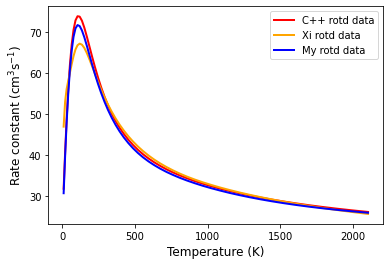

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
#fig.set_size_inches(4,3.5)
ax = plt.subplot()
ax.plot(temperature, orig_rotd, color ='r', linewidth = 2, label ='C++ rotd data')
ax.plot(temperature, me_rotd, color ='orange', linewidth =2, label = 'Xi rotd data')
ax.plot(temperature, test2, color ='b', linewidth =2, label ='My rotd data')
ax.set_ylabel("Rate constant (cm$^3$s$^{-1}$)",fontsize =12)
ax.set_xlabel("Temperature (K)", fontsize =12)
ax.legend(loc='best')
#fig.savefig('first_code_compare.pdf', bbox_inches='tight')

In [14]:
# Divide the flux data with avogadro, to obtain the flux.

index =np.where(temperature>300.0)
temperature = temperature[index]
avoga = 6.0221e12
me_rotd = me_rotd[index]/avoga
orig_rotd = orig_rotd[index]/avoga
test3 = test2[index]/avoga

print (me_rotd)
print (orig_rotd)
print (test3)

[8.68965975e-12 8.40570565e-12 8.13503595e-12 7.87931120e-12
 7.63853141e-12 7.41103602e-12 7.19848558e-12 6.99755899e-12
 6.80991681e-12 6.63389847e-12 6.46784344e-12 6.31341226e-12
 6.16728384e-12 6.02945816e-12 5.89827469e-12 5.77539397e-12
 5.65915544e-12 5.54789857e-12 5.44162335e-12 5.33866923e-12
 5.23903622e-12 5.14106375e-12 5.04641238e-12 4.95342156e-12
 4.86209130e-12 4.77242158e-12 4.68441241e-12 4.59806380e-12
 4.51337573e-12 4.43034822e-12 4.35064180e-12 4.27259594e-12]
[8.65810930e-12 8.33264144e-12 8.03374238e-12 7.75809103e-12
 7.50568738e-12 7.27321034e-12 7.05899935e-12 6.86305442e-12
 6.68205443e-12 6.51433885e-12 6.35824712e-12 6.21377925e-12
 6.07595357e-12 5.94809120e-12 5.82687103e-12 5.71063250e-12
 5.59937563e-12 5.49476096e-12 5.39180684e-12 5.29383438e-12
 5.20084356e-12 5.10951329e-12 5.02150413e-12 4.93681606e-12
 4.85378855e-12 4.77574268e-12 4.69935737e-12 4.62463260e-12
 4.55322894e-12 4.48348583e-12 4.41706381e-12 4.35230235e-12]
[8.47212766e-12 8.1632

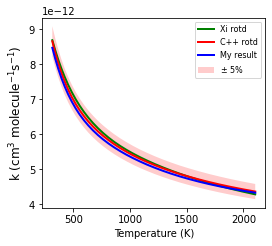

In [18]:
fig = plt.figure()
fig.set_size_inches(4,3.5)
ax = plt.subplot(111)

ax.plot(temperature, me_rotd, color='g', linestyle = '-', linewidth=2, label="Xi rotd")
ax.plot(temperature, orig_rotd, color='r', linestyle = '-', linewidth=2, label='C++ rotd')
ax.plot(temperature, test3, color = 'b', linestyle= '-', linewidth=2, label = 'My result')
plus_1 = orig_rotd * 1.05
minus_1 = orig_rotd * 0.95
ax.fill_between(temperature, plus_1, minus_1, facecolor='r', alpha=0.2, label='$\pm$ 5%')
ax.set_ylabel("k (cm$^3$ molecule$^{-1}$s$^{-1}$)",fontsize =12)
#ax.set_yscale('log')
ax.set_xlabel("Temperature (K)", fontsize = 10)   
lgd = ax.legend(loc='best', fontsize=8)
#fig.show()
#fig.savefig('code_compare.pdf', bbox_inches='tight')